<a href="https://colab.research.google.com/github/8181035/123/blob/main/NS_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Программирование нейронной сети**

Начнем с импорта.

In [ ]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

Имена классов не включены в набор данных, поэтому прописываем сами:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Далее нужно разделить данные, о том как они структурированы мы
уже говорили ранее, в массивах X будут храниться картинки
(тренировочные и тестовые), а в массивах Y будут храниться ответы
(тренировочные и тестовые).
При загрузке данных передается два картежа (тренировочные и
тестовый).

In [ ]:
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

Проверяем первое изображение в тренировочном наборе. Вы увидите, что значения пикселей находятся в диапазоне от 0 до 255:

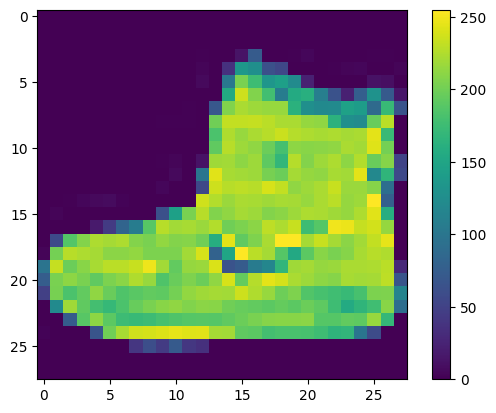

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

Далее данные нужно нормализовать.

In [ ]:
x_train=x_train/255
x_test=x_test/255

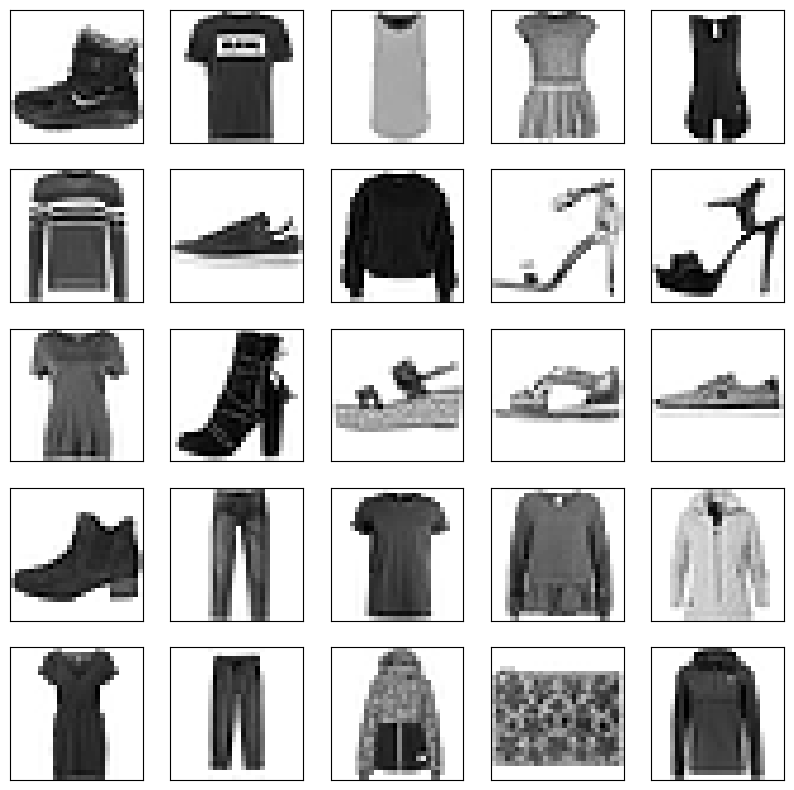

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)

Далее начинается самый важный процесс – создание модели.

In [ ]:
model=Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

Далее нужно скомпилировать модель, что бы все важные связи
создались и появились изначальные рандомные весы.
Здесь определяется оптимизатор и метод ошибок, в это углубляться не
будем, так как много математического, третьим аргументом
передаются метрики в нашем случае это точность.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Следующим шагом модель нужно натренировать.

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7572 - accuracy: 0.7533
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5141 - accuracy: 0.8256
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4679 - accuracy: 0.8390
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4432 - accuracy: 0.8473
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4260 - accuracy: 0.8514
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4118 - accuracy: 0.8564
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3998 - accuracy: 0.8618
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3910 - accuracy: 0.8635
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3817 - accuracy: 0.8673
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.374

Далее нужно протестировать модель.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Accuracy={test_acc}, Loss={test_loss}' )

313/313 [==============================] - 1s 3ms/step - loss: 0.4102 - accuracy: 0.8571
Accuracy=0.8571000099182129, Loss=0.41024550795555115


Далее можно «предсказывать» что изображено на изображении.

In [ ]:
predicts = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Номер картинки: 15
[8.5372268e-04 9.8709965e-01 8.7942863e-05 1.1025984e-02 8.6339901e-04
 2.8760607e-07 5.3094049e-05 3.2603266e-06 1.1725804e-05 1.0251904e-06]
Trouser


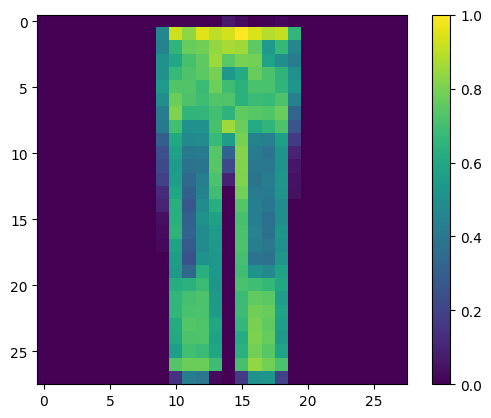

In [ ]:
inp=int(input('Номер картинки: '))
print(predicts[inp])
ind_class=np.argmax(predicts[inp])
print(class_names[ind_class])
plt.figure()
plt.imshow(x_test[inp])
plt.colorbar()
plt.grid(False)